<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science in IoT<br/>Asignatura: Predictive Analytics</center>

# Challenge S1: Introducción a las series Temporales

## 0. Objetivo

<img src="bicicletas_chicago_challenge.jpg" style="float:right; height: 250px"></img>
El objetivo de este challenge es realizar el análisis de una serie temporal y eliminar sus componentes de estacionalidad y tendencia.

Vamos a utilizar el dataset de los alquileres de bicicletas de Chicago, pero en este caso utilizaremos como serie temporal el número de **alquileres de los usuarios registrados**.

Además, realizaremos el análisis con los **datos a nivel horario**, es decir, sin agrupar.

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe con la serie temporal que incluya nuestra variable tiempo y el número de alquileres de usuarios registrados.

In [2]:
## Carga del fichero
data_path = 'hour_chicago.csv'
df_datos = pd.read_csv(data_path)

In [3]:
## Creación de la variable tiempo
df_datos['date_hr'] = (df_datos['date_str'].map(str) + ' ' + df_datos['hr'].map(str) + ':00:00')
df_datos['date_hr'].tail()
df_datos['date'] = pd.to_datetime(df_datos['date_hr'], format='%Y-%m-%d %H:%M:%S')
df_datos.head()

,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date_hr,date
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16,2011-01-01 0:00:00,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40,2011-01-01 1:00:00,2011-01-01 01:00:00
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32,2011-01-01 2:00:00,2011-01-01 02:00:00
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13,2011-01-01 3:00:00,2011-01-01 03:00:00
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1,2011-01-01 4:00:00,2011-01-01 04:00:00


In [4]:
## Creación del dataframe con nuestra serie temporal
df_datos.index = df_datos['date']
df_datos.head()
df_TimeSeriesData = pd.DataFrame(df_datos['registered'])
df_TimeSeriesData.describe()

,registered
count,17379.000000
mean,153.786869
std,151.357286
min,0.000000
25%,34.000000
50%,115.000000
75%,220.000000
max,886.000000


In [5]:
df_TimeSeriesData.head()

,registered
date,
2011-01-01 00:00:00,13
2011-01-01 01:00:00,32
2011-01-01 02:00:00,27
2011-01-01 03:00:00,10
2011-01-01 04:00:00,1


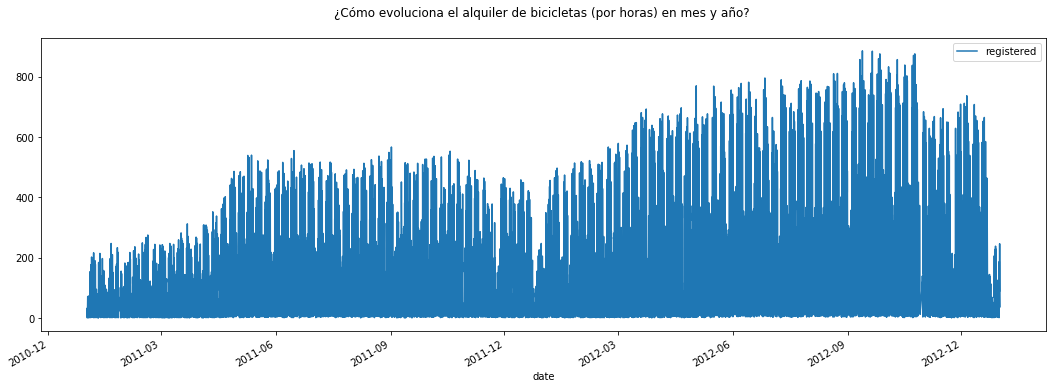

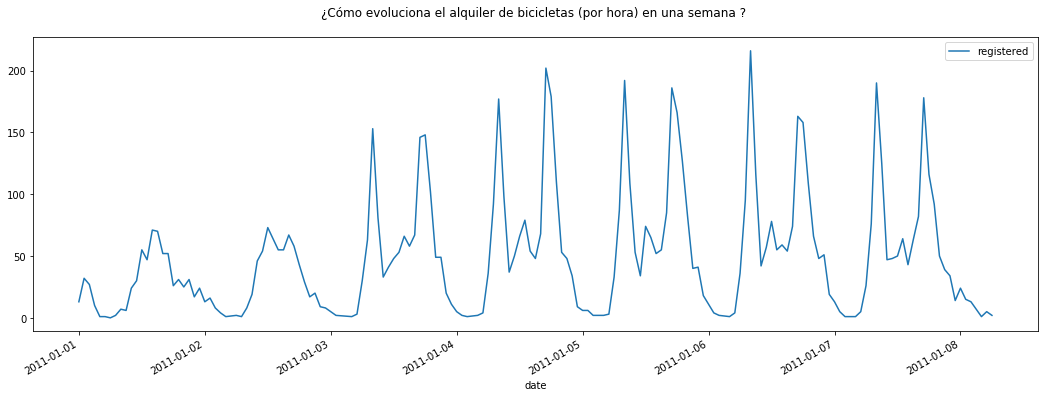

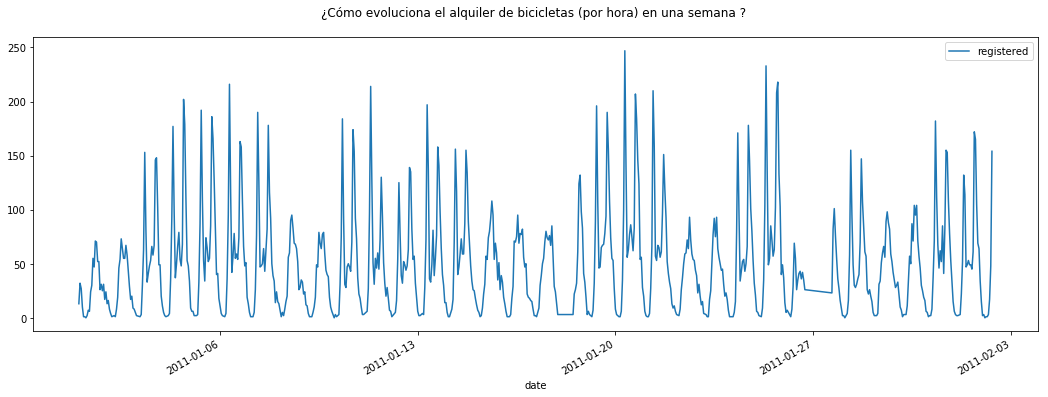

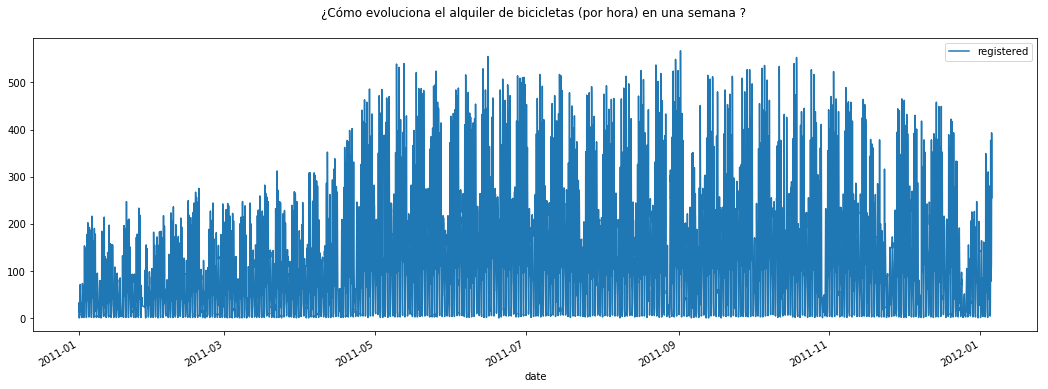

In [6]:
## Visualización de nuestra serie temporal
## Visualizamos nuestra serie temporal
fig_size = (18,6)
fig_size_subplot = (14,7)
df_TimeSeriesData.plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas (por horas) en mes y año? \n')

# ## Hacemos un zoom sobre unos cuantos días para apreciar mejor el comportamiento
df_TimeSeriesData[:(24*7)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')
df_TimeSeriesData[:(24*30)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')
df_TimeSeriesData[:(24*365)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')

In [7]:
# #df_TimeSeriesData['cnt_media_movil_12']=df_TimeSeriesData_monthly.rolling(24).mean()
# #average = df_TimeSeriesData_monthly.rolling(24).mean()
# df_TimeSeriesData_monthly = df_TimeSeriesData.resample('h').sum()
# df_TimeSeriesData['cnt_media_movil_12']=df_TimeSeriesData_monthly.rolling(24).mean()
# average = df_TimeSeriesData_monthly.rolling(24).mean()

In [8]:
# plt.figure(figsize=fig_size)
# plt.plot(df_TimeSeriesData[-24*30:],color='b')
# plt.plot(average[-24*30:],color='r')
# plt.title('¿Existe tendencia en el alquiler de bicicletas? \n',fontsize= 20)
# plt.xlabel('Meses')
# plt.ylabel('N. bicicletas alquiladas')
# plt.legend(['Alquileres mes','Media móvil mensual'], loc=2)

## 3. Componentes de una serie temporal

**P: ¿Qué componentes tiene nuestra serie temporal?**

In [9]:
#df_TimeSeriesData['cnt_media_movil_12']=df_TimeSeriesData_monthly.rolling(24).mean()
#average = df_TimeSeriesData_monthly.rolling(24).mean()
#df_TimeSeriesData_monthly = df_TimeSeriesData.resample('h').sum()
df_TimeSeriesData['media_movil_diaria']=df_TimeSeriesData['registered'].rolling(24).mean()
df_TimeSeriesData['media_movil_semanal']=df_TimeSeriesData['registered'].rolling(168).mean()
df_TimeSeriesData['media_movil_mensual']=df_TimeSeriesData['registered'].rolling(5040).mean()
df_TimeSeriesData['media_movil_anual']=df_TimeSeriesData['registered'].rolling(8689).mean()
df_tendencia_anual = df_TimeSeriesData[-24*365:]

#df_tendencia_anual['tendencia_anual']= df_tendencia_anual.rolling(365).mean()
#average = df_TimeSeriesData.rolling(24).mean()

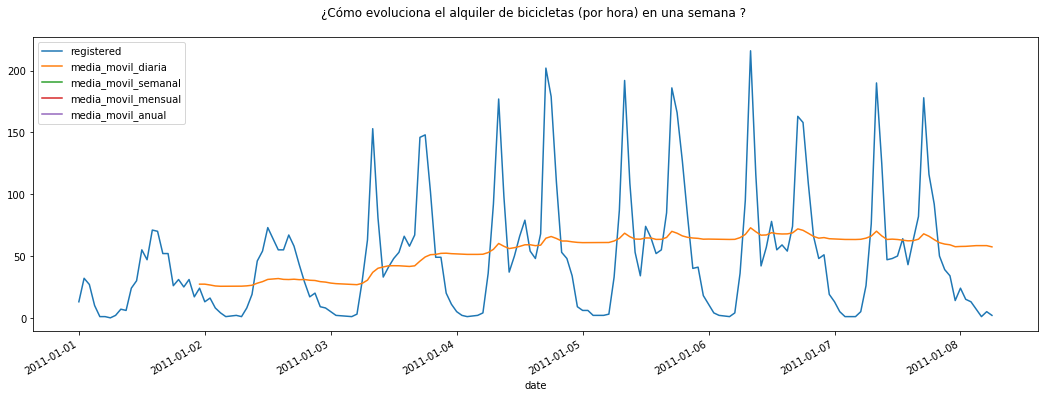

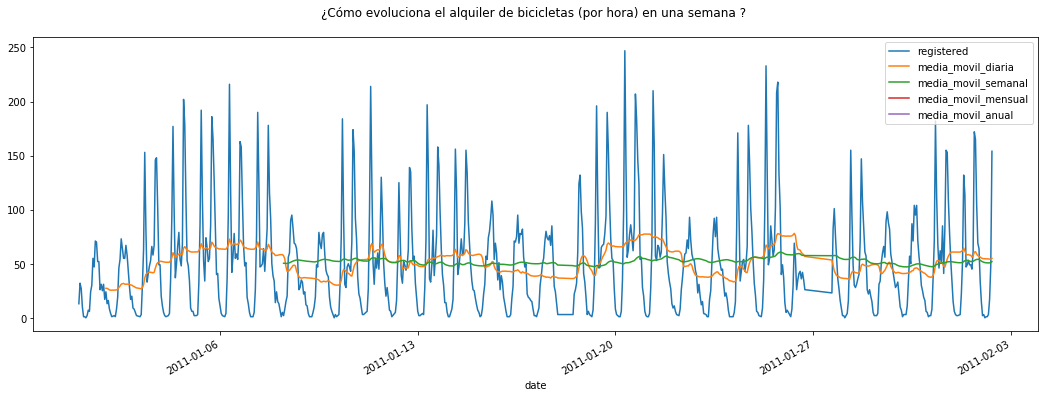

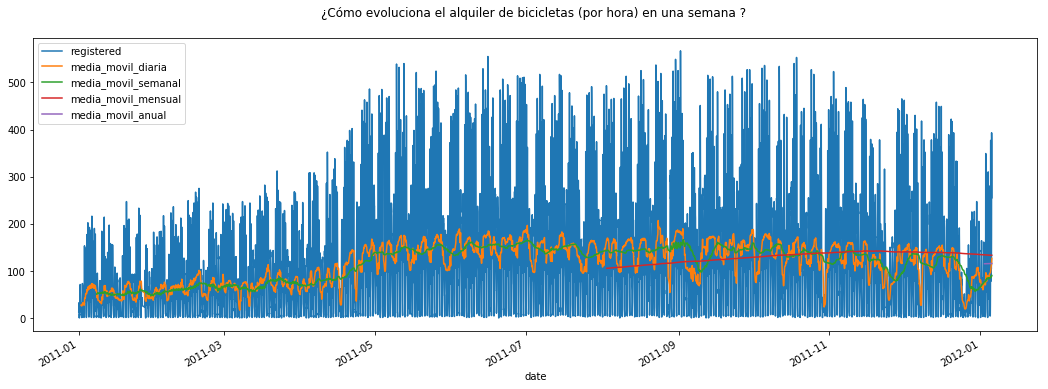

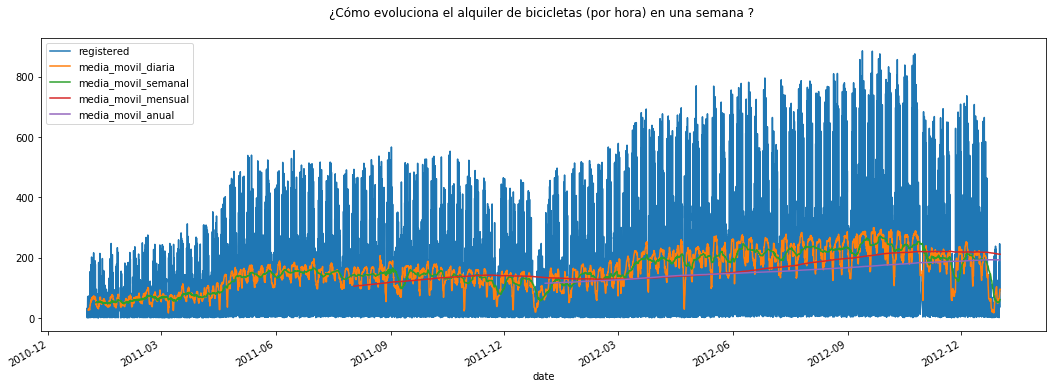

In [10]:
# Estacionalidad semanal
# plt.figure(figsize=fig_size)
# plt.plot(df_TimeSeriesData[-24*30:])
# #plt.plot(average[-24*30:],color='r')
# plt.title('¿Existe estacionalidad en el alquiler de bicicletas? \n',fontsize= 20)
# plt.xlabel('Meses')
# plt.ylabel('N. bicicletas alquiladas')
# plt.legend(['Alquileres mes','Media móvil diaria'], loc=2)
df_TimeSeriesData[:(24*7)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')
df_TimeSeriesData[:(24*30)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')
df_TimeSeriesData[:(24*365)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')
df_TimeSeriesData[:(24*730)].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas (por hora) en una semana ? \n')

**P: ¿Hay más de un tipo de estacionalidad?**

Si, existe  diaria y semanal y mensual

### 3.1. Si existe componente estacional, elimínala y representa los resultados.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1247289e8>],
      dtype=object)

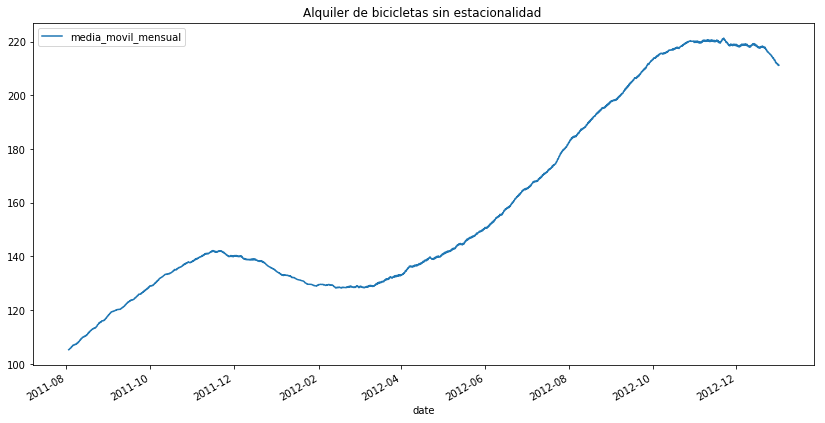

In [11]:
df_TimeSeriesData.loc[:,['media_movil_mensual']].plot(subplots = True,
                                                            title = ['Alquiler de bicicletas sin estacionalidad '],
                                                            figsize = fig_size_subplot)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126983ba8>],
      dtype=object)

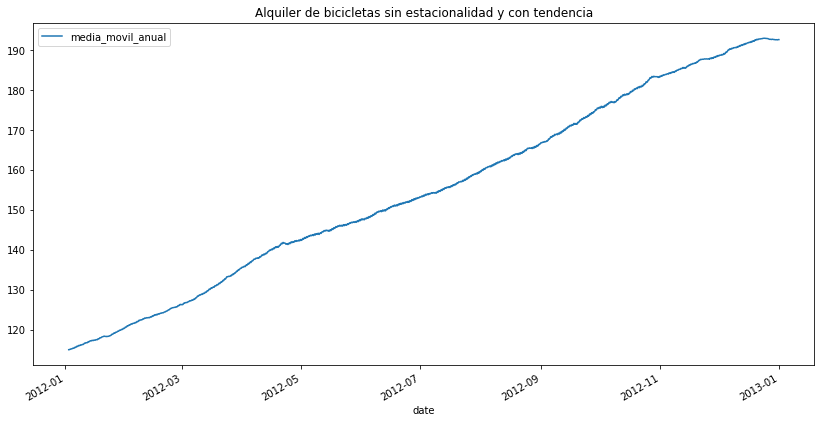

In [12]:
df_TimeSeriesData.loc[:,['media_movil_anual']].plot(subplots = True,
                                                            title = ['Alquiler de bicicletas sin estacionalidad y con tendencia'],
                                                            figsize = fig_size_subplot)

### 3.2. Si existe tendencia, elimínala y representa los resultados.

In [13]:
## Eliminamos la tendencia de la serie
df_TimeSeriesData['media_anual_shift'] = df_TimeSeriesData['media_movil_mensual'].shift(1)
df_TimeSeriesData['sin_tendencia'] = df_TimeSeriesData['media_movil_anual'] - \
                                     df_TimeSeriesData['media_movil_anual'].shift(1)
df_TimeSeriesData['sin_tendencia_2'] = df_TimeSeriesData['media_anual_shift'] - \
                                     df_TimeSeriesData['media_movil_anual']

In [14]:
df_TimeSeriesData.tail(15)

,registered,media_movil_diaria,media_movil_semanal,media_movil_mensual,media_movil_anual,media_anual_shift,sin_tendencia,sin_tendencia_2
date,,,,,,,,
2012-12-31 09:00:00,144,71.791667,53.910714,211.274802,192.582115,211.313294,0.014731,18.731178
2012-12-31 10:00:00,87,71.625000,54.023810,211.224405,192.586258,211.274802,0.004143,18.688543
2012-12-31 11:00:00,114,72.083333,54.214286,211.173810,192.593279,211.224405,0.007020,18.631126
2012-12-31 12:00:00,172,75.208333,54.619048,211.156349,192.602831,211.173810,0.009552,18.570978
2012-12-31 13:00:00,165,77.083333,54.928571,211.145437,192.605478,211.156349,0.002647,18.550871
2012-12-31 14:00:00,185,79.750000,55.708333,211.147222,192.608240,211.145437,0.002762,18.537196
2012-12-31 15:00:00,246,85.791667,56.976190,211.159325,192.619289,211.147222,0.011048,18.527933
2012-12-31 16:00:00,184,89.208333,57.910714,211.167659,192.624238,211.159325,0.004949,18.535088
2012-12-31 17:00:00,150,91.416667,58.642857,211.177579,192.625504,211.167659,0.001266,18.542155


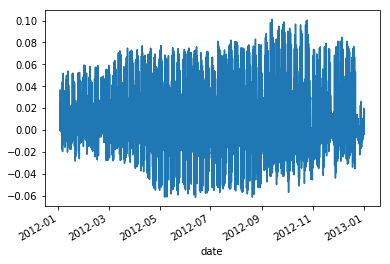

In [15]:
# df_TimeSeriesData.loc[:,['sin_tendencia']].plot(subplots = True,
#                                                             title = ['Alquiler de bicicletas sin estacionalidad'],
#                                                             figsize = fig_size_subplot)
df_TimeSeriesData['sin_tendencia'].plot()

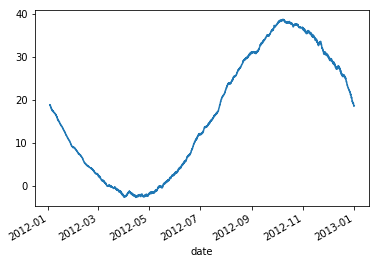

In [16]:
df_TimeSeriesData['sin_tendencia_2'].plot()